In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.linalg import inv
from sklearn import metrics

In [2]:
skin = open('data.txt','r')
rl = skin.readlines()
#print(rl)

src_data = []
count = [0,0]
for e in rl:
    if(e.find('\n') != -1):
        e = e[:-1]
    a= e.split(' ')
    f = np.ones(15)
    for i in range(1,15):
        f[i] = a[i-1]
    f = [float(i) for i in f]
    src_data.append(np.array(f))

skin.close()
#print(src_data)
x_points = [e[:-1] for e in src_data]
y_points = [e[-1]-1 for e in src_data]


In [3]:
print(len(src_data))
x_train,y_train = np.array(x_points[:216]), y_points[0:216]
x_test,y_test = np.array(x_points[216:]), y_points[216:]

print(len(x_train), len(x_test))

270
216 54


In [4]:
def sig(w):
    return (1 / (1 + np.exp(-1*w)))
def p(x,B):
    p_list = []
    for e in x:
        w = np.dot(e.T,B)
        p_list.append(sig(w))
    return np.array(p_list)
def hess(x,B):
    x_hs = []
    for e in x:
        w = np.dot(e.T,B)
        a = np.dot(sig(w), (1-sig(w)))
        a = np.dot(a,e.T)
        x_hs.append(a)
    return np.array(x_hs)
def update(B, X, X_hs, Y, P):
    P = p(X,B)
    return B + np.dot( np.dot( inv( np.dot(X.T, X_hs) ), X.T ), (Y-P) )


def newton(x_train,y_train):
    
    B = np.zeros(x_train[0].shape[0])
    #print(B.shape)
    X = x_train
    Y = y_train
    count = 0
    while(count < 1000):
        count+=1
        P = p(X, B)
        X_hs = hess(X,B)
        B = update(B,X,X_hs,Y,P)
        #print(B)
    return B
def evaluate(x,y,B):
    correct = 0
    #print(x)
    for cn in range(x.shape[0]):
        e = x[cn]
        z = y[cn]
        w = np.dot(e.T, B)
        #print(sig(w), z)
        if(sig(w) >= 0.5 and z == 1):
            correct+=1.0
        if(sig(w) < 0.5 and z == 0):
            correct+=1.0
    acc = correct / x.shape[0]
    return acc

def predict(x,B):
    correct = 0
    #print(x)
    preds=  []
    
    for cn in range(x.shape[0]):
        e = x[cn]
        w = np.dot(e.T, B)
        preds.append(sig(w))
        '''if(sig(w) < 0.5):
            preds.append(0.0)
        else:
            preds.append(1.0)'''
            
    return preds

In [5]:
B = newton(x_train,y_train)

In [6]:
#train
print(evaluate(x_train,y_train,B))

#train
print(evaluate(x_test,y_test,B))

0.8564814814814815
0.8888888888888888


In [7]:
preds = predict(x_test,B)

In [8]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

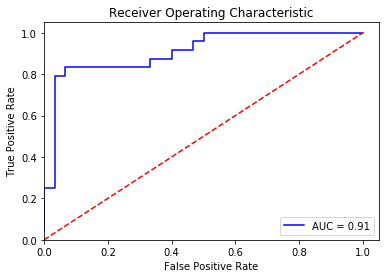

In [9]:
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
print(threshold)

[0.99792593 0.97645766 0.9763118  0.64299674 0.52521955 0.51632487
 0.2417803  0.22995389 0.18295204 0.16257923 0.12015902 0.11899209
 0.10335178 0.09196714 0.0087733 ]
